# Libraries Used

- pandas
- matplotlib
- networkx
- pyvis

In [58]:
import pandas as pd

In [59]:
# Load the dataset
file_path = 'data/DCID_2.0_Release_update_February_2023.xlsx'
dcid = pd.read_excel(file_path, "DCID_2.0_Release_update_Februar")
dcid = dcid.drop_duplicates(subset='Cyberincidentnum', keep='first')

In [60]:
# Convert the correlates of war (COW) country codes in to dcid to ISO codes
cow_countries = pd.read_csv('data/COW-country-codes.csv')
cow_countries = cow_countries.drop_duplicates(subset='CCode', keep='first')

In [61]:
dcid = dcid.merge(cow_countries, left_on='initiator', right_on='CCode', how='left', suffixes=('', '_y'))

# Replace the target column with a country code from a correlates of war country codes
dcid = dcid.merge(cow_countries, left_on='target', right_on='CCode', how='left', suffixes=('', '_y'))

# Rename the columns StateAbb to initiator_iso
dcid = dcid.rename(columns={'StateAbb': 'initiator_iso'})
dcid = dcid.rename(columns={'StateAbb_y': 'target_iso'})

dcid_short = dcid[['initiator_iso', 'target_iso']]

In [62]:
# Create the adjacency matrix for dcid
ct = pd.crosstab(dcid_short['initiator_iso'], dcid_short['target_iso'])
idx = ct.columns.union(ct.index)
adjacency_matrix = ct.reindex(index = idx, columns=idx, fill_value=0)

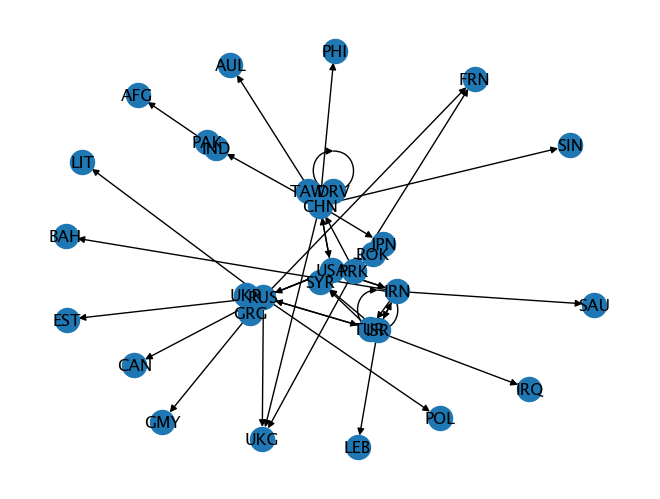

In [63]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph(adjacency_matrix)
nx.draw(G, with_labels=True)

In [68]:
# Show the network on a map
# https://towardsdatascience.com/from-geojson-to-network-graph-analyzing-world-country-borders-in-python-ab81b5a8ce5a 

print(G.nodes(data=True))

import geopandas as gpd
plt.rcParams['font.family'] = 'Arial'

world_map = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world_map = world_map[world_map['continent'] != 'Antarctica']
world_map.plot()
plt.show() 

world_map = world_map.set_index('iso_a3')

# # 1. Geocode the countries
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="dcid-sna")

def geolocate(country):
    loc = geolocator.geocode(country)
    return (loc.latitude, loc.longitude)

# print(geolocate('USA'))

# 2. Add the latitude and longitude to the graph
for node in G.nodes:
    # print(node)
    lat, lon = geolocate(node)
    print(lat, lon)
    print(type(node))
    # Add the latitude and longitude as attributes to the graph
    # node['lat'] = lat
    # node['long'] = lon

# 3. Plot the network on the map



SyntaxError: invalid syntax (2644883269.py, line 27)